# Week02

任务:

- [x] 实现灰度化和二值化

- [x] 实现最临近插值


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def show(img, cmap=None):
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.show()

class MyImage:
    '''
    读取、显示、保存、缩放、灰度化、二值化
    '''
    __img = None

    def __init__(self, path=None):
        if path:
            self.__img = plt.imread(path)
        else:
            self.__img = None
    
    def load(self, path):
        self.__img = plt.imread(path)

    def set(self, img):
        self.__img = img

    def get(self) -> np.ndarray:
        return self.__img

    def show(self, cmap=None):
        if self.__img is None:
            raise ValueError('image is None')
        plt.imshow(self.__img, cmap=cmap)
        plt.axis('off')
        plt.show()

    def save(self, path):
        plt.imsave(path, self.__img)

    def resize(self, width, height, interpolation=cv2.INTER_LINEAR) -> np.ndarray:
        '''
        interpolation:
            cv2.INTER_NEAREST: 最近邻插值
            cv2.INTER_LINEAR: 双线性插值
            cv2.INTER_AREA: 使用像素区域关系进行重采样
            cv2.INTER_CUBIC: 4x4像素邻域的双三次插值
            cv2.INTER_LANCZOS4: 8x8像素邻域的Lanczos插值
        '''
        return cv2.resize(self.__img, (width, height), interpolation=interpolation)
        
    def resizeDIY(self, width, height, interpolation=cv2.INTER_LINEAR) -> np.ndarray:
        w, h, c = self.__img.shape
        x_ratio = w / width
        y_ratio = h / height
        img = np.zeros((width, height, c), dtype=self.__img.dtype)
        if(interpolation == cv2.INTER_NEAREST):
            for i in range(width):
                for j in range(height):
                    img[i, j] = self.__img[int(i*x_ratio), int(j*y_ratio)]
        elif(interpolation == cv2.INTER_LINEAR):
            for i in range(width):
                for j in range(height):
                    x = i * x_ratio
                    y = j * y_ratio
                    x1 = int(x)
                    y1 = int(y)
                    x2 = min(x1 + 1, w - 1)
                    y2 = min(y1 + 1, h - 1)
                    img[i, j] = (self.__img[x1, y1] * (x2 - x) * (y2 - y) +
                                    self.__img[x1, y2] * (x2 - x) * (y - y1) +
                                    self.__img[x2, y1] * (x - x1) * (y2 - y) +
                                    self.__img[x2, y2] * (x - x1) * (y - y1))
        else:
            raise ValueError('unsupported interpolation method')
        return img

    def gray(self) -> np.ndarray:
        return cv2.cvtColor(self.__img, cv2.COLOR_RGB2GRAY)
    
    def grayDIY(self) -> np.ndarray:
        return np.dot(self.__img[...,:3], [0.299, 0.587, 0.114])
    
    def binary(self, threshold=128) -> np.ndarray:
        gray = self.gray()
        return cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY)[1]
    
    def binaryDIY(self, threshold=128) -> np.ndarray:
        gray = self.grayDIY()
        return (gray > threshold) * 255



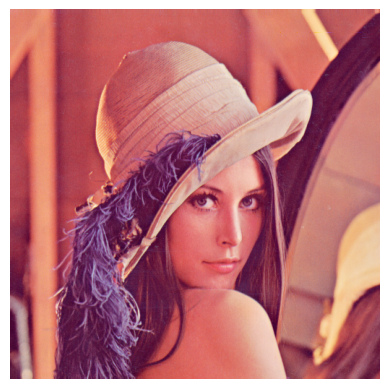

In [3]:
img = MyImage("./res/lena.png")
img.show()

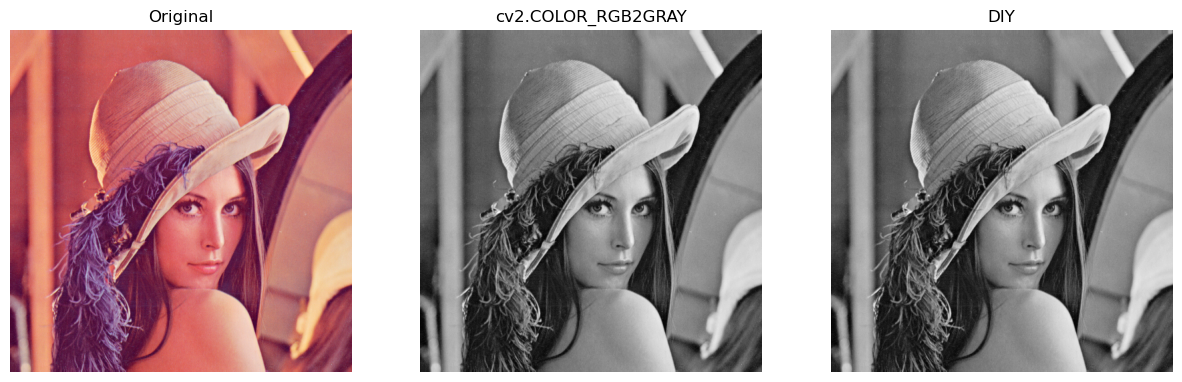

In [4]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img.get())
plt.axis('off')
plt.title('Original')

plt.subplot(1, 3, 2)
plt.imshow(img.gray(), cmap='gray')
plt.axis('off')
plt.title('cv2.COLOR_RGB2GRAY')

plt.subplot(1, 3, 3)
plt.imshow(img.grayDIY(), cmap='gray')
plt.axis('off')
plt.title('DIY')

plt.show()

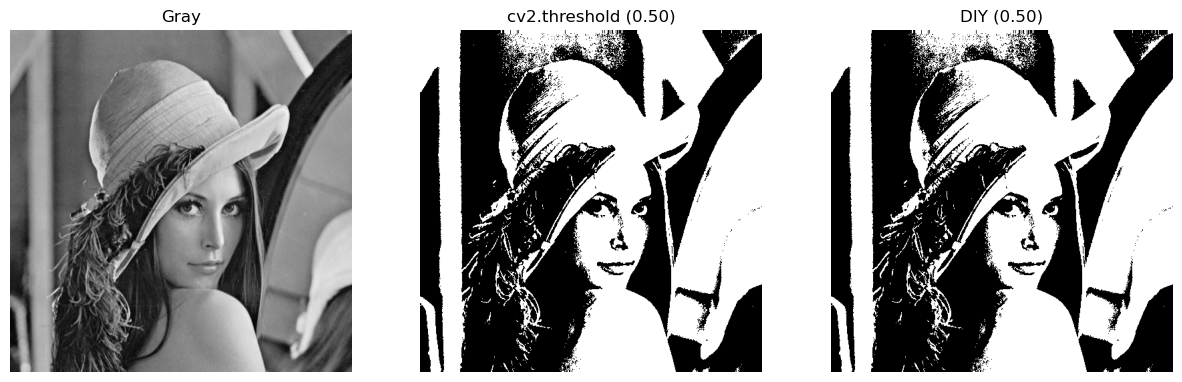

In [5]:
threshold = 0.5

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img.gray(), cmap='gray')
plt.axis('off')
plt.title('Gray')

plt.subplot(1, 3, 2)
plt.imshow(img.binary(threshold), cmap='gray')
plt.axis('off')
plt.title('cv2.threshold (%.2f)' % threshold)

plt.subplot(1, 3, 3)
plt.imshow(img.binaryDIY(threshold), cmap='gray')
plt.axis('off')
plt.title('DIY (%.2f)' % threshold)

plt.show()

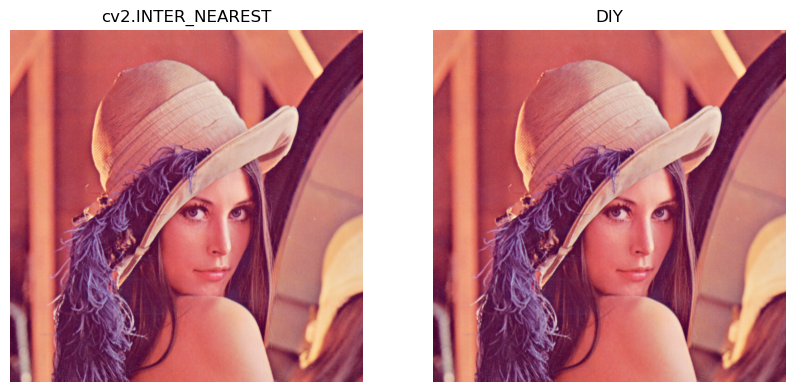

In [6]:
w, h = img.get().shape[:2]
w, h = w * 2, h * 2

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img.resize(w, h, cv2.INTER_NEAREST))
plt.axis('off')
plt.title('cv2.INTER_NEAREST')

plt.subplot(1, 2, 2)
plt.imshow(img.resizeDIY(w, h, cv2.INTER_NEAREST))
plt.axis('off')
plt.title('DIY')

plt.show()

双线性差值:
$$
\begin{aligned}
    f(x,y) = &f(Q_{11}) \cdot (x_2 - x) \cdot (y_2 - y) + \\
             &f(Q_{21}) \cdot (x - x_1) \cdot (y_2 - y) + \\
             &f(Q_{12}) \cdot (x_2 - x) \cdot (y - y_1) + \\
             &f(Q_{22}) \cdot (x - x_1) \cdot (y - y_1)
\end{aligned}
$$

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


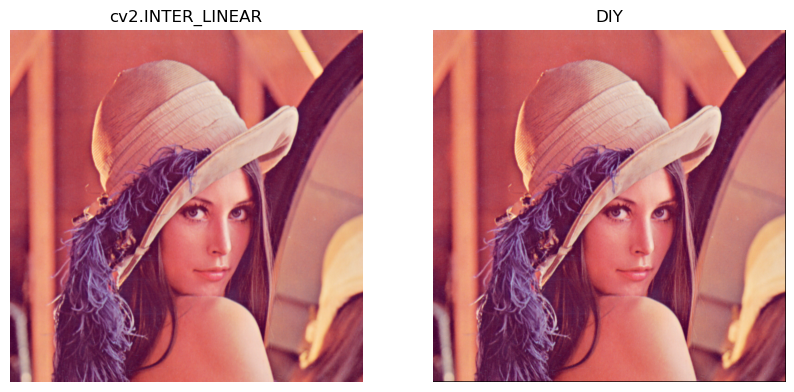

In [7]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img.resize(w, h, cv2.INTER_LINEAR))
plt.axis('off')
plt.title('cv2.INTER_LINEAR')

plt.subplot(1, 2, 2)
plt.imshow(img.resizeDIY(w, h, cv2.INTER_LINEAR))
plt.axis('off')
plt.title('DIY')

plt.show()